<h4><b>Pandas</b> (lib for data manipulation etc)</h4>
<h4><b>Numpy</b> (core of all DS libraries)</h4>
<h4><b>MatPlotLib</b> (for data visualisation)</h4>
<h4><b>Seaborn</b> (for advanced data visualisation)</h4>
<h4><b>Plotly</b> (for advanced data visualisation)</h4>
<h4><b>Scikit learn</b> (for ML)</h4>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

<h4>Here is the main dataset initialized.</h4>

In [5]:
data = pd.read_csv('StudentPerformanceFactors.csv')

<h4>Dropped duplicates from dataset in line 1 (There were no duplicates). <br>
Dropped <b>229 records</b> with some empty fields in line 2. <br>
I also reset indexes, because after clearing the data, indexes remained the same. <br>
There are 3 columns with potentially boolean data types:
</h4>
<ul>
  <li>Extracurricular_Activities</li>
  <li>Internet_Access</li>
  <li>Learning_Disabilities</li>
</ul>
<h4>So I changed types from str -> bool</h4>

In [6]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

columns_to_map = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
changing = {'Yes': True, 'No': False}
for col in columns_to_map:
    data[col] = data[col].map(changing)

<h4>That's how dataset looks after changes.</h4>

In [7]:
data

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                          False            7               73   
1                          False            8               59   
2                           True            7               91   
3                           True            8               98   
4                           True            6               65   
...                          ...          ...              ...   
6373                       False            7               76   
6374                       False            8               81   
6375                        True            6               65   
6376                        True            6               91   
6377                        True            9               94   

     Motivation_Level  Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             True                  0           Low   
1                 Low             True                  2        Medium   
2              Medium             True                  2        Medium   
3              Medium             True                  1        Medium   
4              Medium             True                  3        Medium   
...               ...              ...                ...           ...   
6373           Medium             True                  1          High   
6374           Medium             True                  3           Low   
6375              Low             True                  3           Low   
6376             High             True                  2           Low   
6377           Medium             True                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6373          Medium      Public       Positive                  2   
6374            High      Public       Positive                  2   
6375          Medium      Public       Negative                  2   
6376          Medium     Private       Positive                  3   
6377          Medium      Public       Positive                  4   

      Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                     False              High School               Near   
1                     False                  College           Moderate   
2                     False             Postgraduate               Near   
3                     False              High School           Moderate   
4                     False                  College               Near   
...                     ...                      ...                ...   
6373                  False      

<h4>
<code>data.info()</code> to check all fields' Dtypes, find non-nulls and column details <br>
<code>data.descibe()</code> to find all statistics about numeric columns.
</h4>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   bool  
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   bool  
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [9]:
data.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.252117  
std             1.233984           1.028926     3.914217  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

<h4>
First of all, to start making hypothesis I need to see what correlates better with Exam Scores. <br>
Let's use <b>correlation matrix</b>.
</h4>

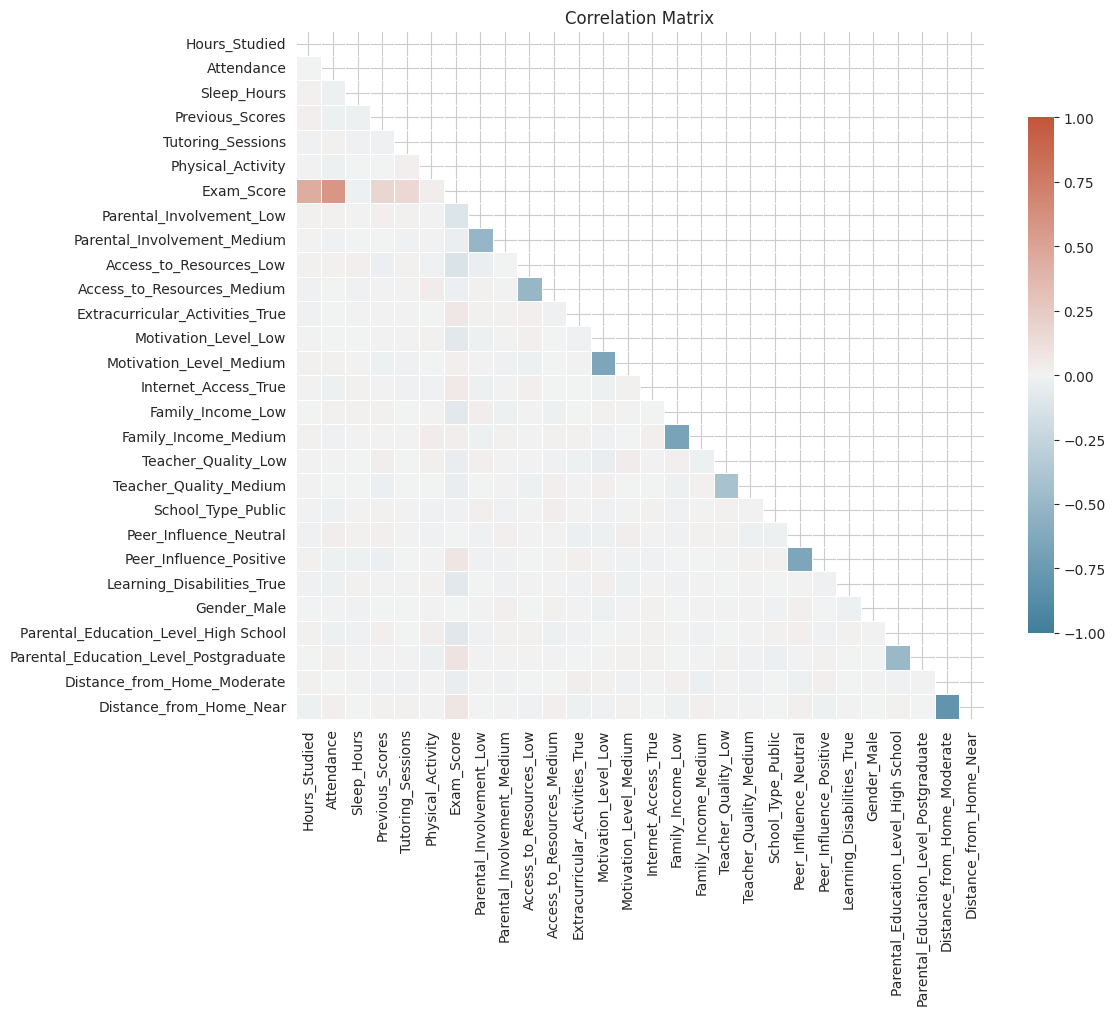

Correlations with Exam_Score:
Exam_Score                               1.000000
Attendance                               0.580259
Hours_Studied                            0.445104
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Parental_Education_Level_Postgraduate    0.092247
Distance_from_Home_Near                  0.081204
Peer_Influence_Positive                  0.080236
Extracurricular_Activities_True          0.063063
Internet_Access_True                     0.051124
Physical_Activity                        0.025148
Family_Income_Medium                     0.024922
Motivation_Level_Medium                  0.022508
Gender_Male                             -0.004932
Peer_Influence_Neutral                  -0.007472
School_Type_Public                      -0.010868
Sleep_Hours                             -0.017171
Access_to_Resources_Medium              -0.024579
Parental_Involvement_Medium             -0.036191
Teacher_Quality_Low 

In [10]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender',
                       'Parental_Education_Level', 'Distance_from_Home']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
correlation_matrix = data_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75},
    annot=False

)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

exam_score_correlation = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("Correlations with Exam_Score:")
print(exam_score_correlation)


<h4>
This code evaluates importance of factors which improve exam results. <br>
Starting from 5% importance, we can make our hypothesis about first 3 (maybe more for fun) columns. <br>
As I found, <b>Random Forest Regression</b> works better than correlation matrices because it can handle nonlinear relations better, <br> categorical columns, it also considers combintions of features, and its more resistant to noise. But in my case, result are almost the same.
</h4>

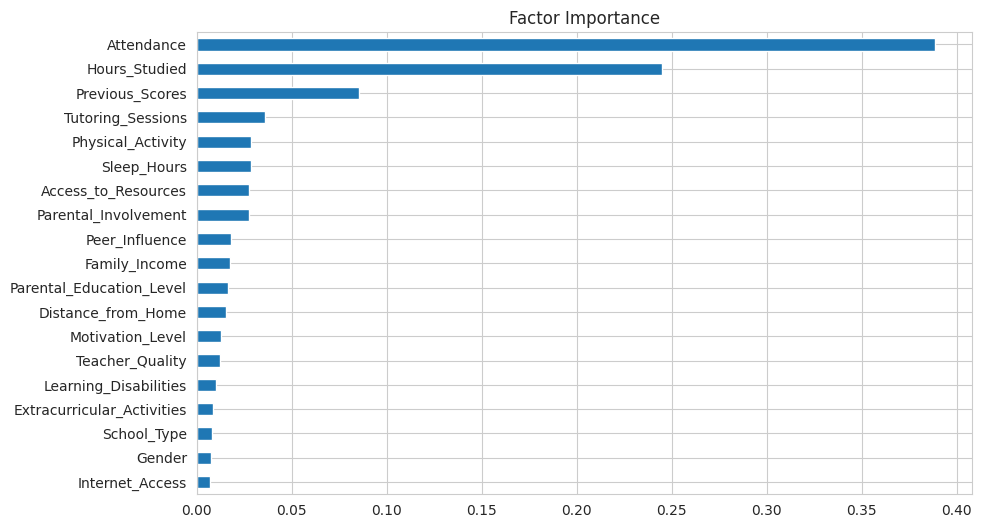

In [11]:
categorical_columns = [
    "Access_to_Resources",
    "Parental_Involvement",
    "Peer_Influence",
    "Family_Income",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Motivation_Level",
    "Teacher_Quality",
    "Learning_Disabilities",
    "Extracurricular_Activities",
    "School_Type",
    "Gender",
    "Internet_Access"
]

tmp_data = data.copy()

for col in categorical_columns:
    # categorical -> numerical, transforms data, trains model
    tmp_data[col] = LabelEncoder().fit_transform(tmp_data[col])

X = tmp_data.drop("Exam_Score", axis=1)
y = tmp_data["Exam_Score"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

factor_importance = pd.Series(model.feature_importances_, index=X.columns)
factor_importance.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Factor Importance")
plt.show()


<h4>
I also want to be sure that data is real enough to make hypothesis <br>
or learn a model which predicts Exam score based on some most valuable factors. <br>
<br>
<b>Normal distribution</b> for exams scores proves it's reliability.<br>
<b>Flat distribution</b> for previous scores. But statistics are fine.<br>
<b>Flat distribution???</b> for attendance. Looks strange. <br>
<b>Normal distribution</b> for hours studied. <br>
<br>
Can't use <code>sns.displot()</code> here because it's a figure-level function

</h4>

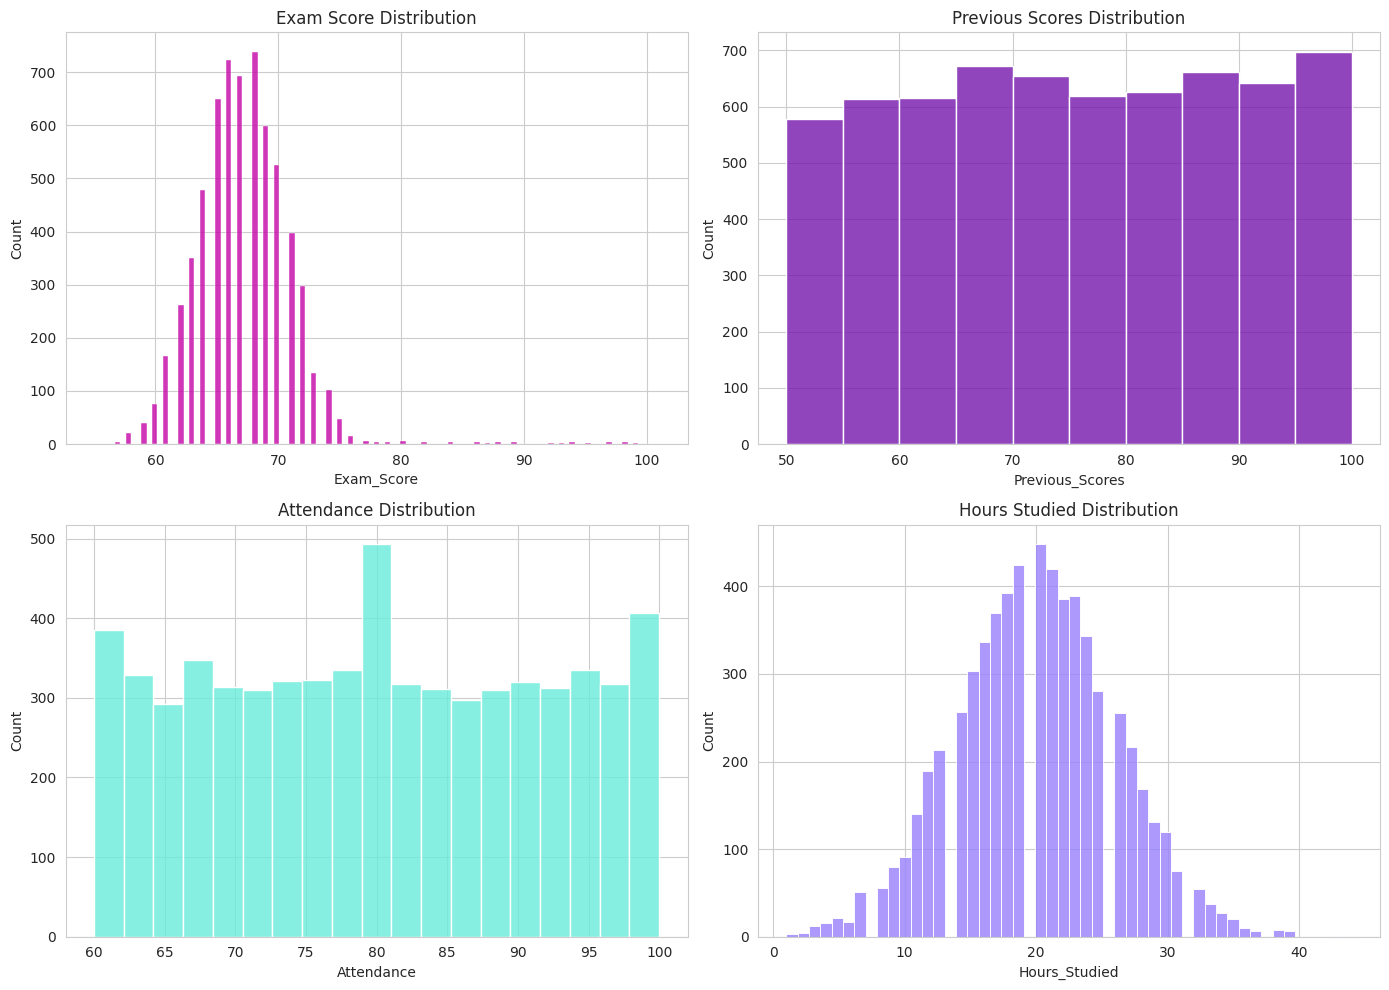

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data=data, x='Exam_Score', alpha=0.8, color='#c505a7', ax=axes[0, 0])
axes[0, 0].set_title('Exam Score Distribution')

sns.histplot(data=data, x='Previous_Scores', alpha=0.8, color='#7617ac', bins=10, ax=axes[0, 1])
axes[0, 1].set_title('Previous Scores Distribution')

sns.histplot(data=data, x='Attendance', alpha=0.8, color='#68ecdb', ax=axes[1, 0])
axes[1, 0].set_title('Attendance Distribution')

sns.histplot(data=data, x='Hours_Studied', alpha=0.8, color='#9780fb', ax=axes[1, 1])
axes[1, 1].set_title('Hours Studied Distribution')

plt.tight_layout()
plt.show()


<h4>
Let's make rought attendance evaluation, for future comparisons.
</h4>

In [13]:
data['Attendance_Rough'] = pd.cut(
    data['Attendance'],
    bins=[0, 20, 40, 60, 80, 100],
    labels=['Bad', 'Poor', 'Fair', 'Good', 'Excellent'],
    right=True
)

<h4>Rough Attendance distribution.</h4>

In [14]:
_tdata = data.Attendance_Rough.value_counts()

labels = _tdata.index
values = _tdata.values

go.Figure(data=[go.Pie(labels=labels, values=values)])

<h4>
Finally let's build large pairplot to see some dependencies
</h4>

<Figure size 1000x1000 with 0 Axes>

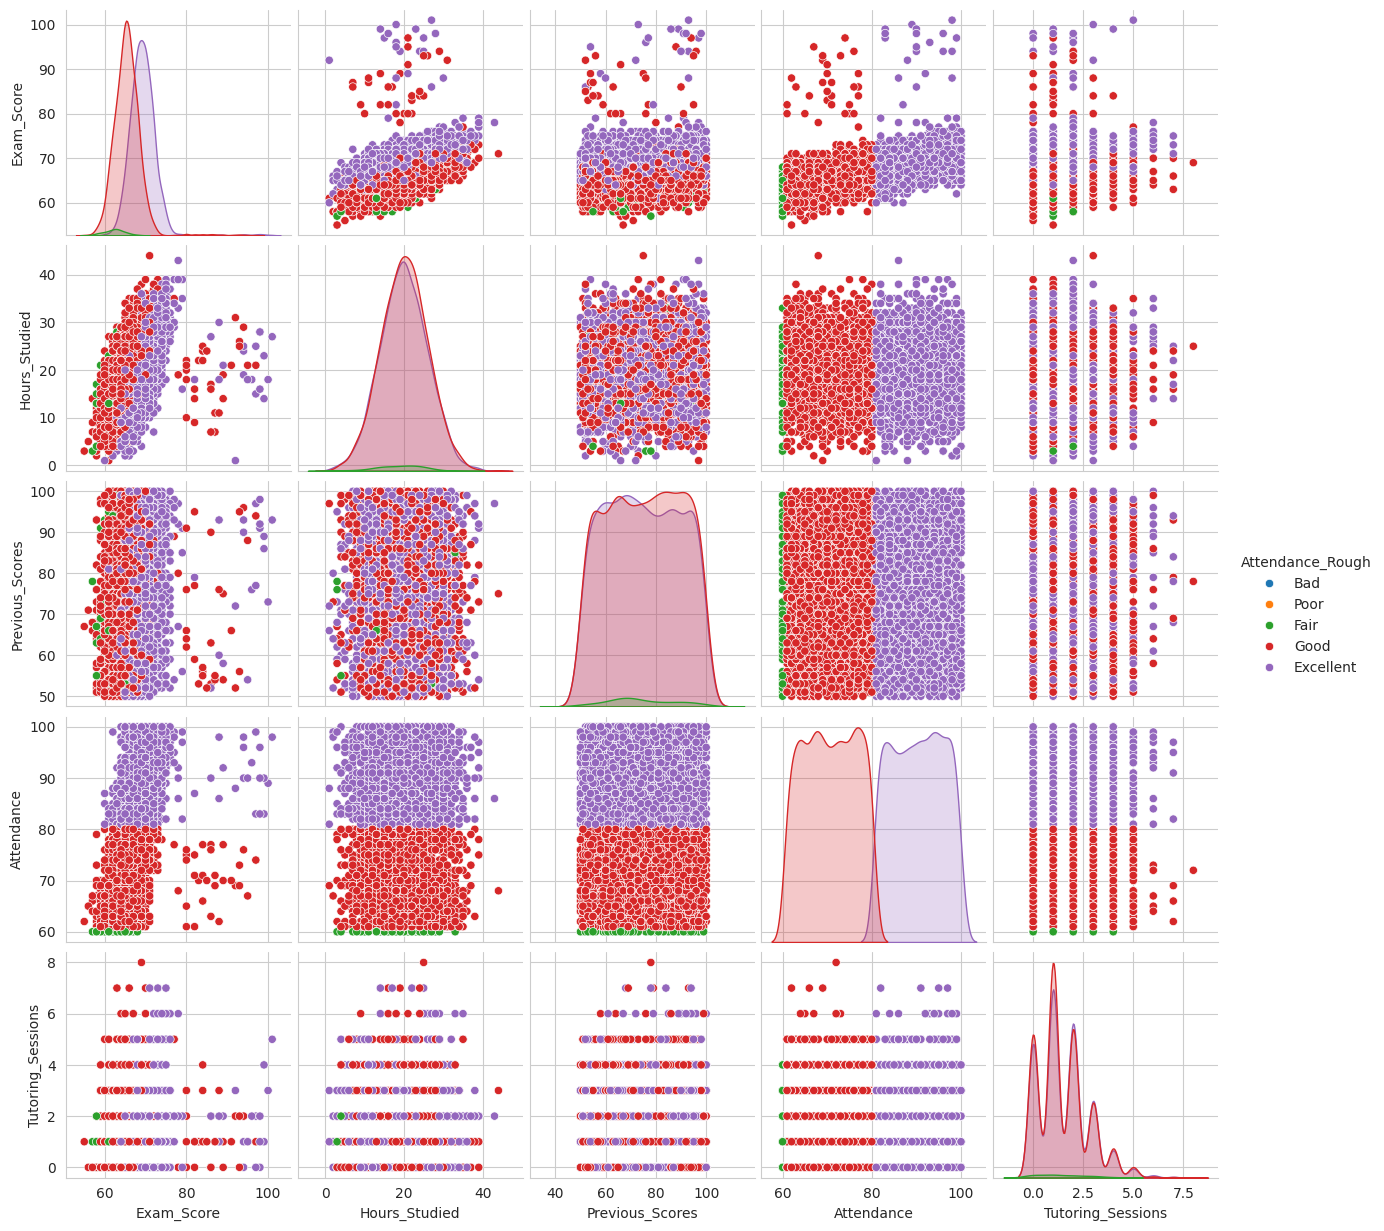

In [15]:
plt.figure(figsize=(10, 10))
sns.pairplot(data,
             vars=[
                 'Exam_Score',
                 'Hours_Studied',
                 'Previous_Scores',
                 'Attendance',
                 'Tutoring_Sessions'
             ],
             hue='Attendance_Rough',
             )
plt.show()

<h3>
From here we can compare most valuable factors.
</h3>

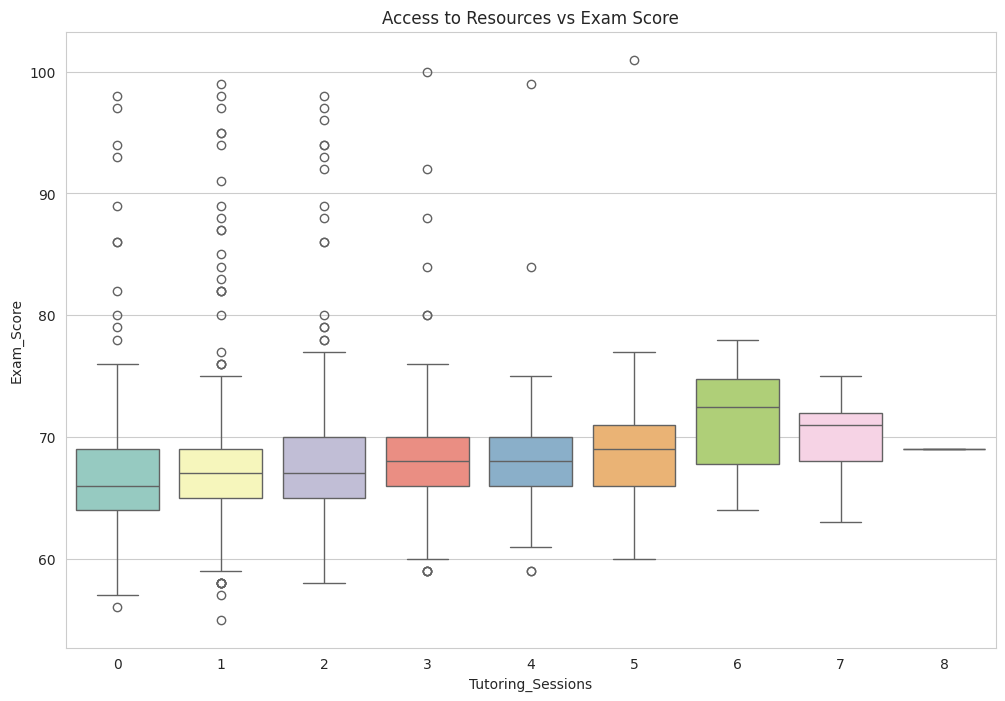

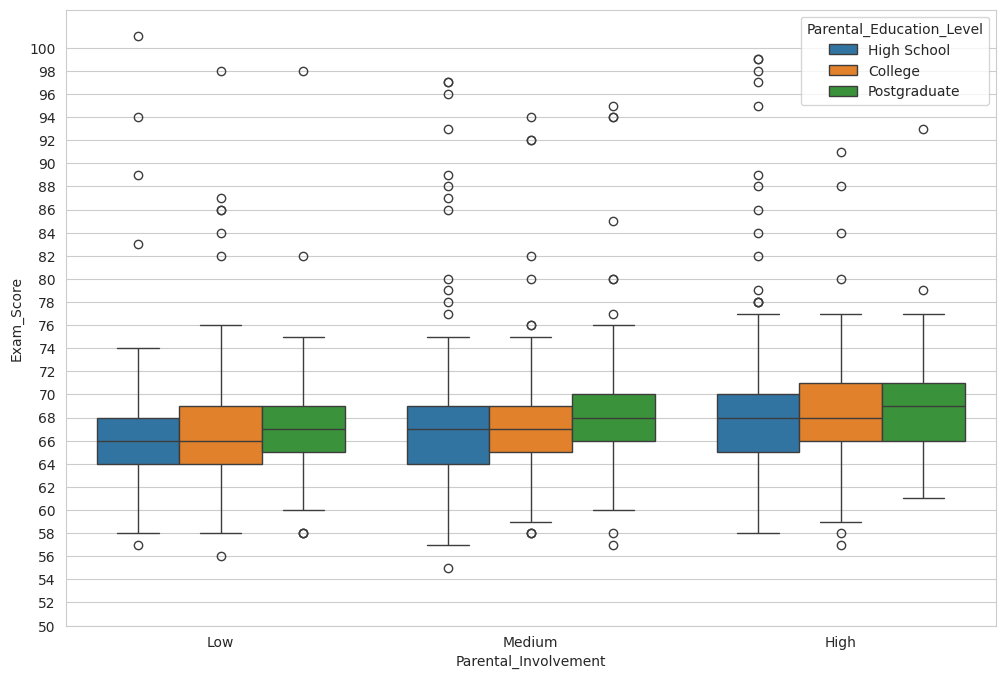

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', data=data, palette='Set3', hue='Tutoring_Sessions', legend=False)
plt.title('Access to Resources vs Exam Score')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Parental_Involvement", y="Exam_Score", hue="Parental_Education_Level")
sns.color_palette('husl', as_cmap=True)
y_min, y_max = plt.ylim()
plt.yticks(np.arange(50, 100 + 1, 2))
plt.show()

Text(0.5, 1.0, 'Hours Studied vs Exam Score')

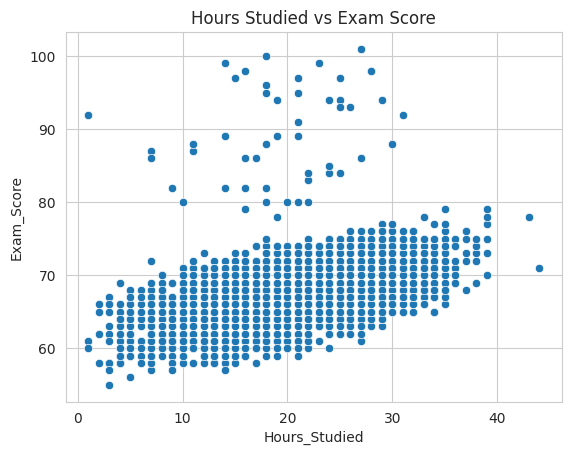

In [17]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Hours Studied vs Exam Score')


Text(0.5, 1.0, 'Distance from Home vs Exam Score')

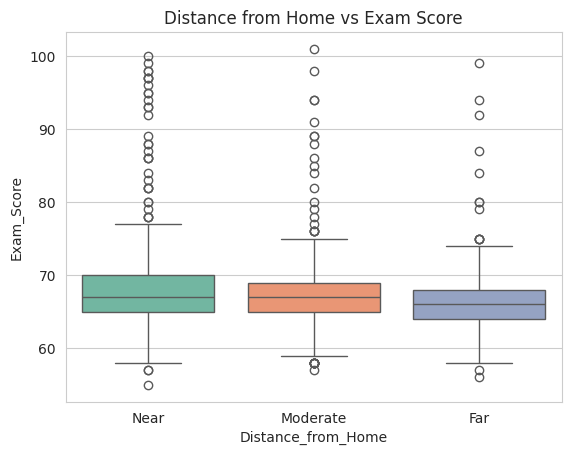

In [18]:
sns.boxplot(x='Distance_from_Home', y='Exam_Score', data=data, palette='Set2', hue='Distance_from_Home', legend=False)
plt.title('Distance from Home vs Exam Score')
# maybe if student lives close to University he will Attend more and Study more

<Axes: xlabel='Distance_from_Home', ylabel='Hours_Studied'>

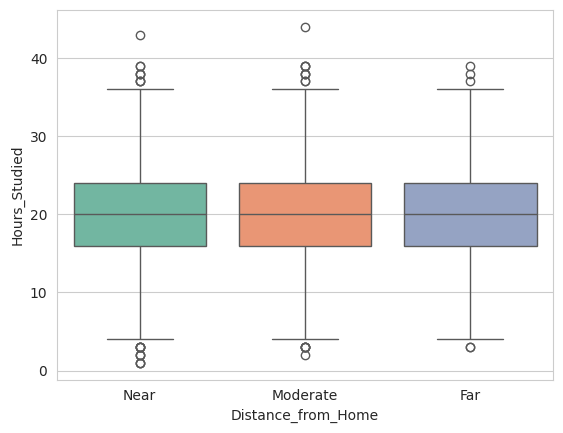

In [19]:

sns.boxplot(x='Distance_from_Home', y='Hours_Studied', data=data, palette='Set2', hue='Distance_from_Home',
            legend=False)
# I find it really strange

<Axes: xlabel='Distance_from_Home', ylabel='Attendance'>

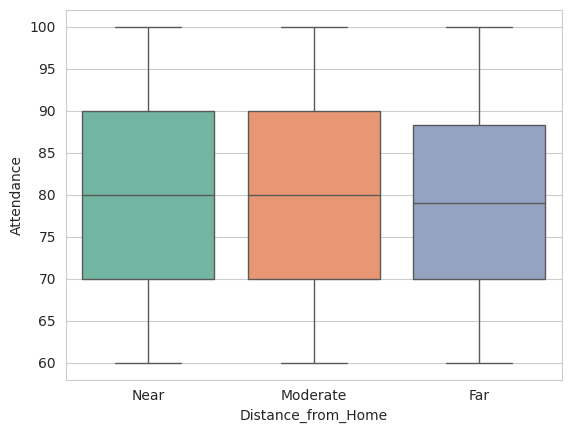

In [20]:
sns.boxplot(x='Distance_from_Home', y='Attendance', data=data, palette='Set2', hue='Distance_from_Home', legend=False)
# So ones who live far attend a bit less (but it may be negligible) 

Text(0.5, 1.0, 'Quality of teachers vs Exam Score')

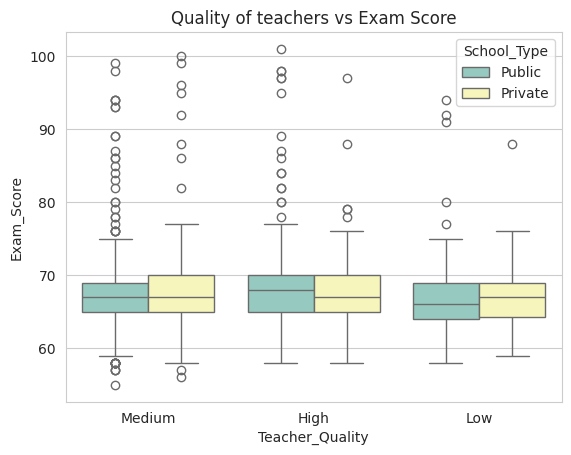

In [21]:
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=data, palette='Set3', hue='School_Type', legend=True)
plt.title('Quality of teachers vs Exam Score')


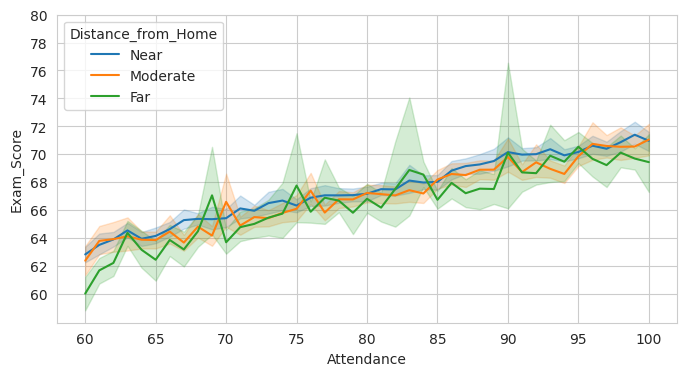

In [23]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='Attendance', y='Exam_Score', data=data, hue='Distance_from_Home')
y_min, y_max = plt.ylim()
plt.yticks(np.arange(60, 80 + 1, 2))

pass

<Axes: xlabel='Physical_Activity', ylabel='Exam_Score'>

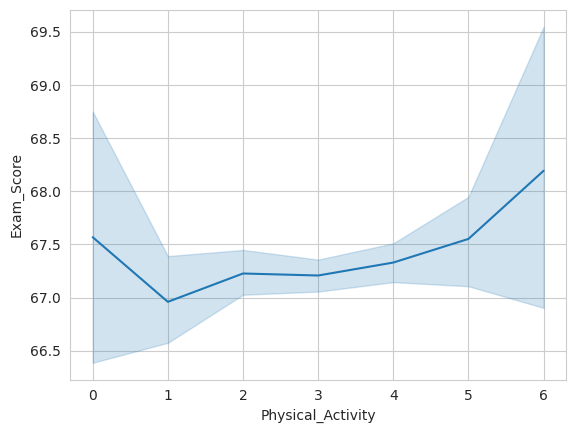

In [24]:
sns.lineplot(x='Physical_Activity', y='Exam_Score', data=data, orient='x')

<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

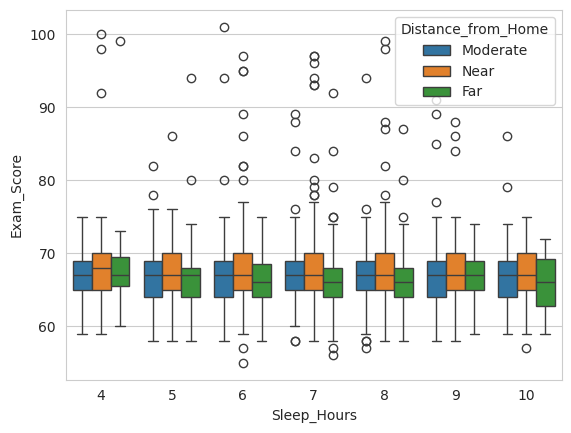

In [25]:
# sns.lineplot(x='Sleep_Hours', y='Exam_Score', data=data, hue='Distance_from_Home')

sns.boxplot(data=data, x='Sleep_Hours', y='Exam_Score', hue='Distance_from_Home')

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

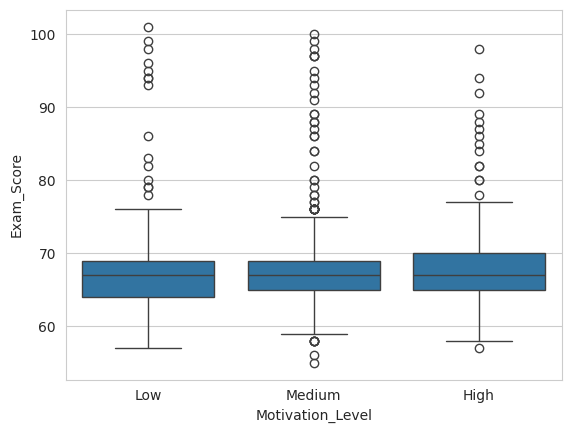

In [26]:
sns.boxplot(data=data, x='Motivation_Level', y='Exam_Score')

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

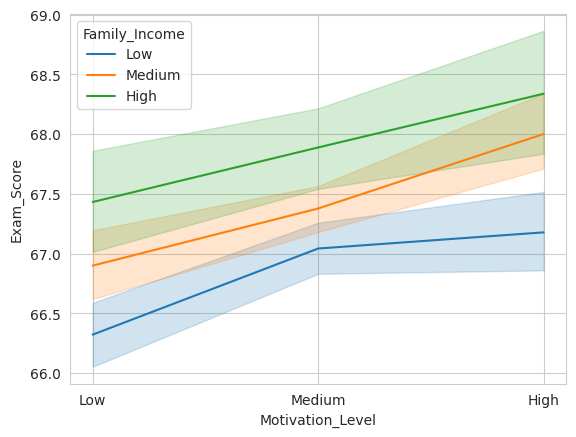

In [27]:
sns.lineplot(data=data, x='Motivation_Level', y='Exam_Score', hue='Family_Income')

In [28]:
# sns.lineplot(data=data, x='Motivation_Level', y='Family_Income')

In [29]:
# sns.boxplot(data=data, x='Gender', y='Exam_Score', hue='School_Type')

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

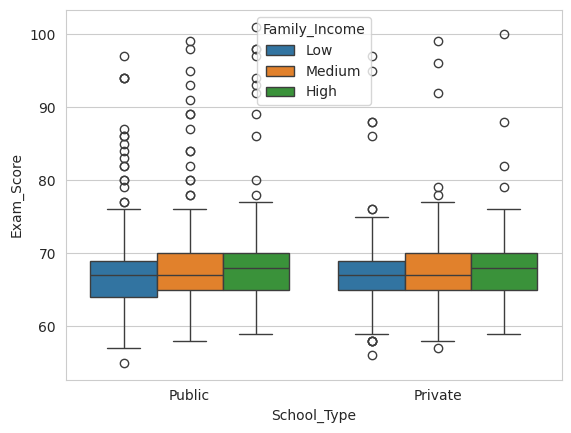

In [30]:
sns.boxplot(data=data, x='School_Type', y='Exam_Score', hue='Family_Income')

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

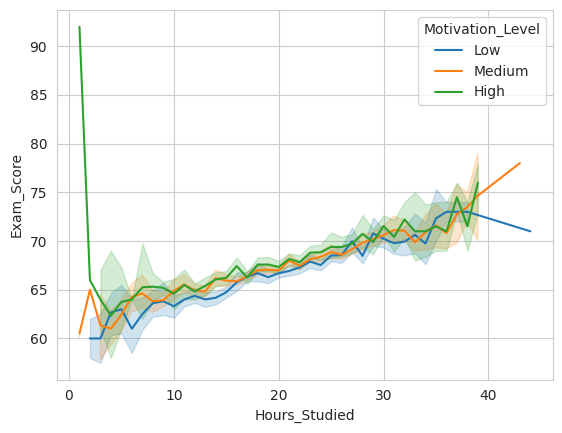

In [31]:
sns.lineplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Motivation_Level')

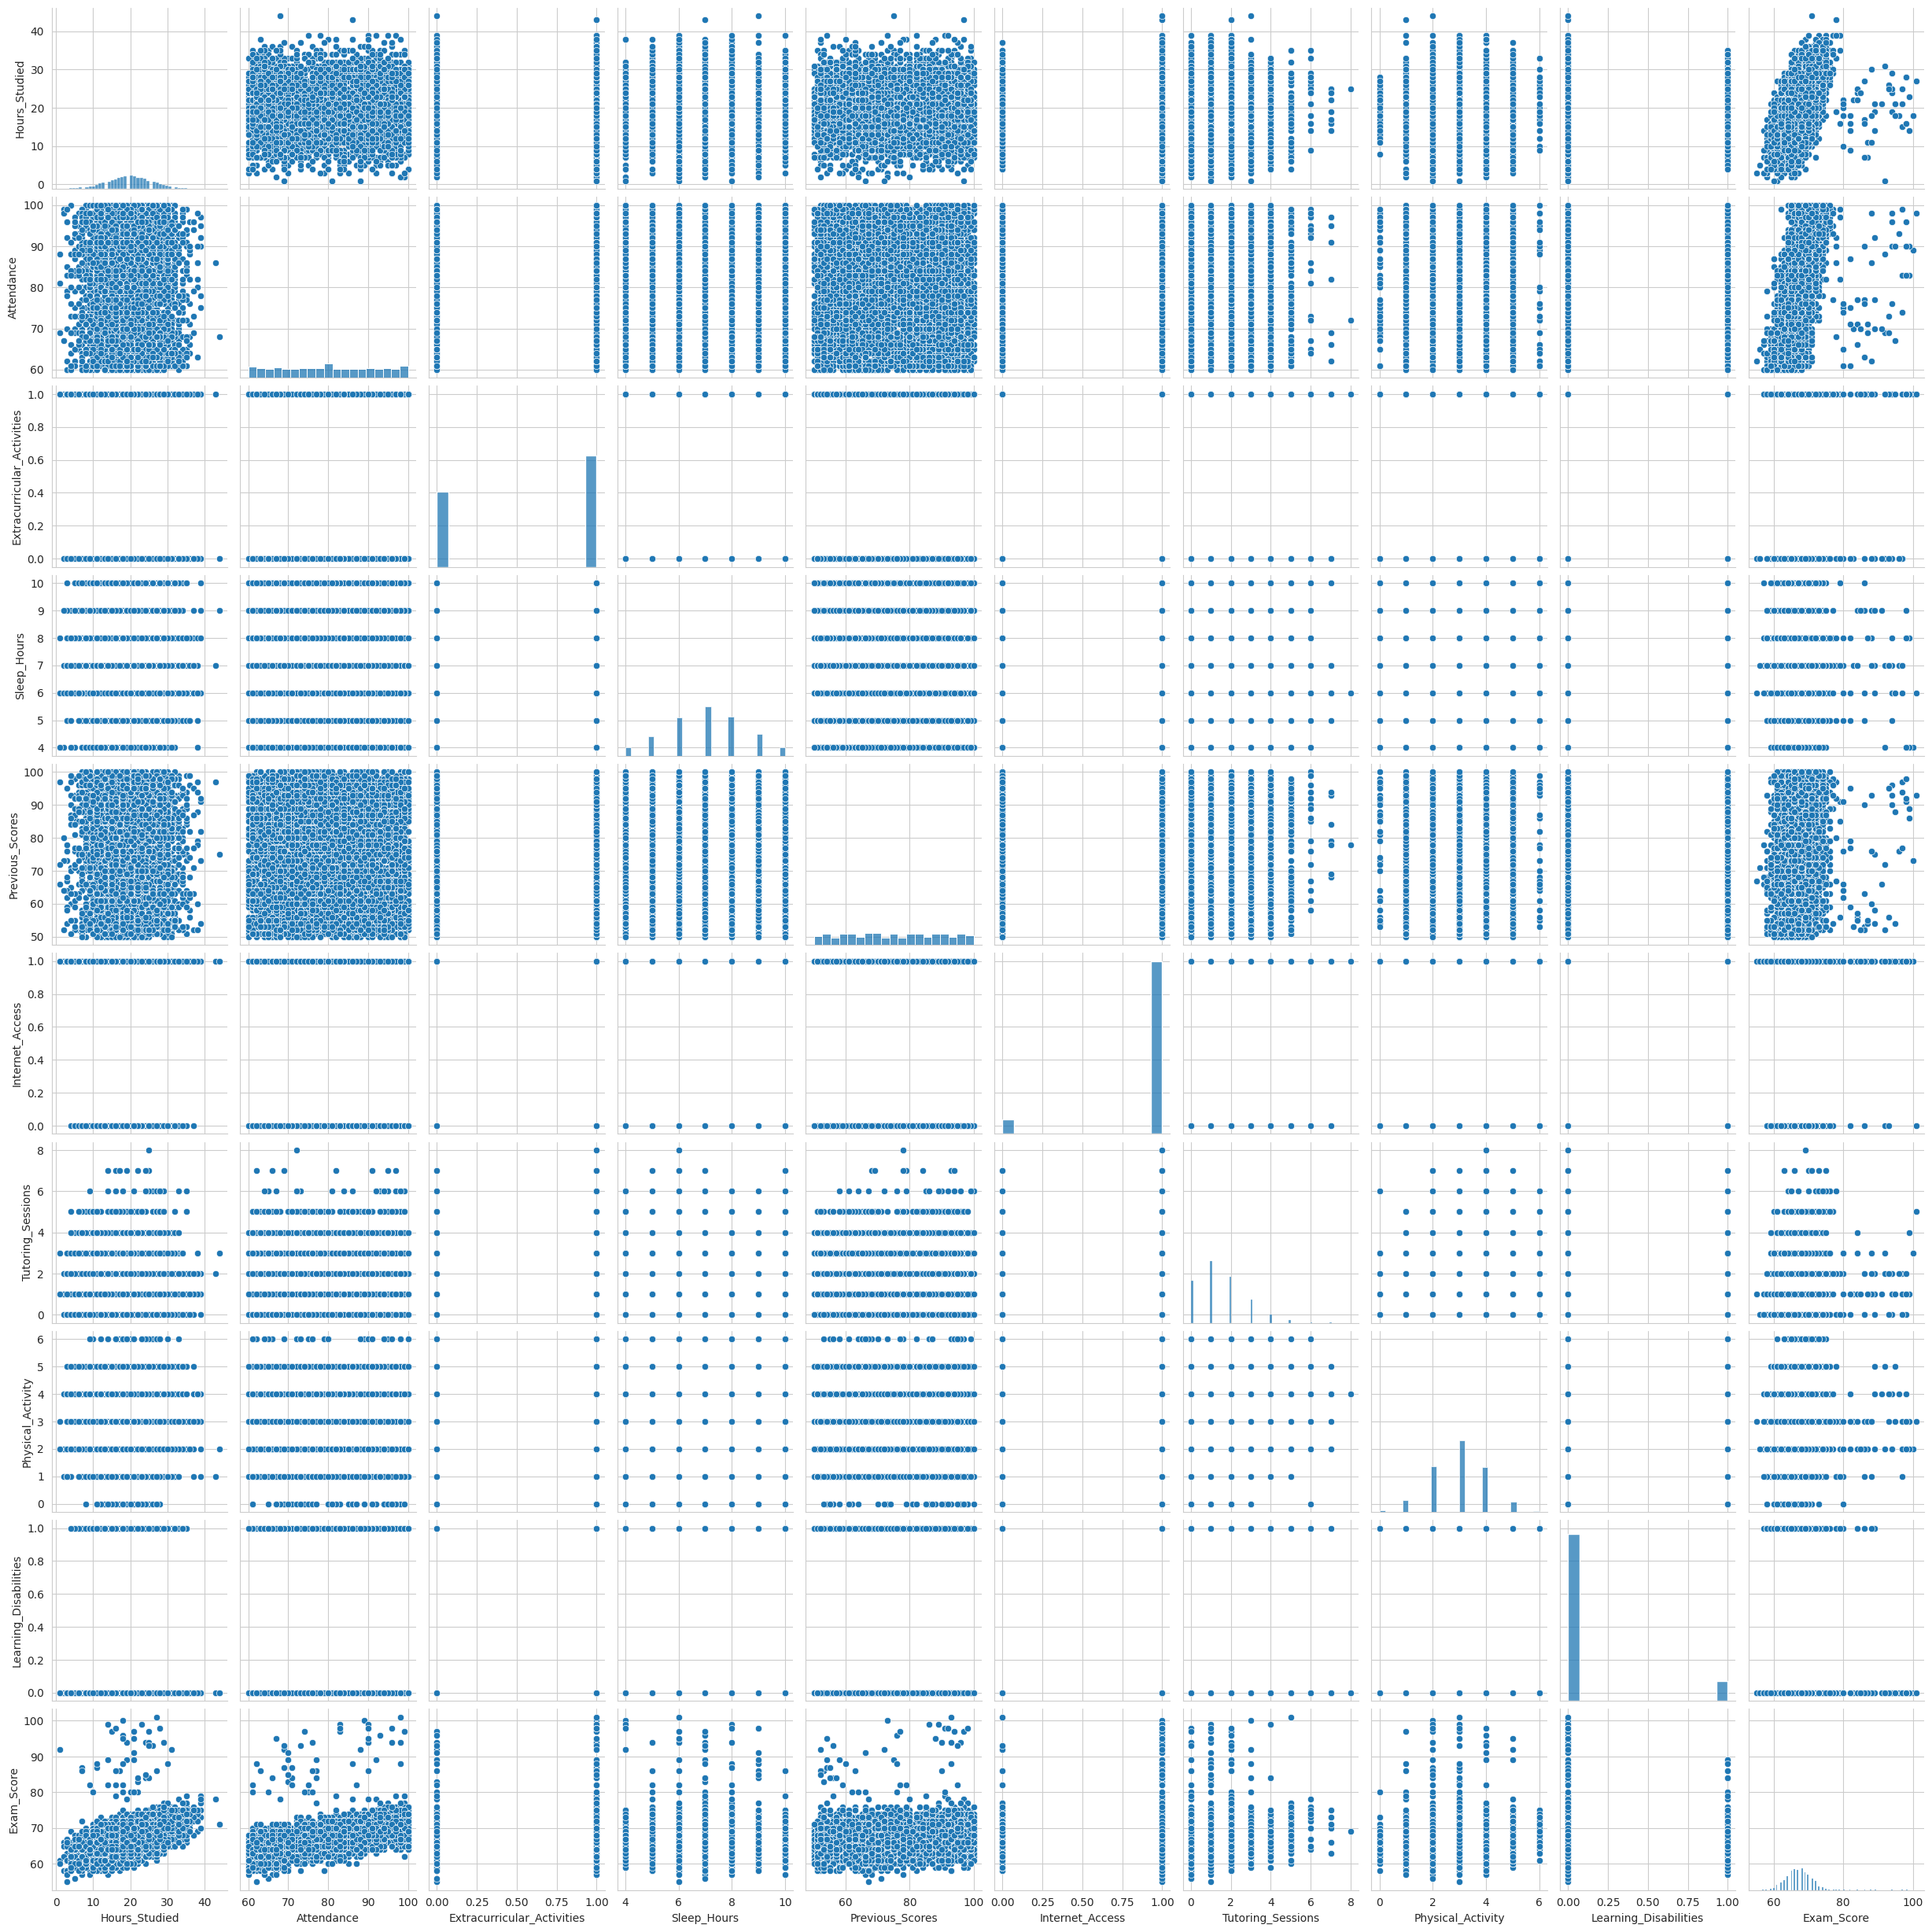

In [32]:
sns.pairplot(data)

<Axes: >

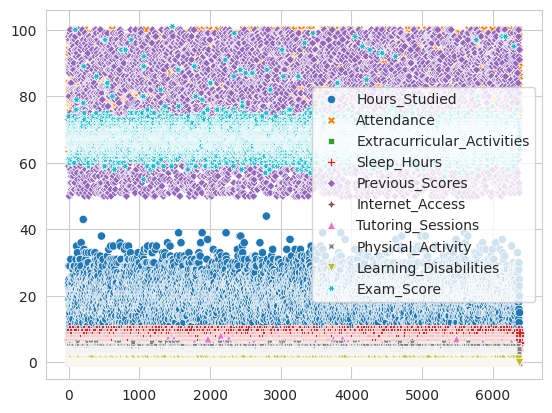

In [33]:
sns.scatterplot(data=data)